# This is a sample Jupyter Notebook



In [1]:
!python --version

Python 3.9.18


# Prepare the data

In [2]:
import pandas as pd
# Have a look at the data
df = pd.read_csv('data\Environment variables-data-as-seriestocolumns-2022-03-01 16_36_12.csv')
df.shape


(62724, 4)

In [3]:
df.head()

,Time,TF.insideEnvironment.insideHumidity,TF.insideEnvironment.insideLight,TF.insideEnvironment.insideTemperature
0,2022-02-28 06:00:01,29.0,0.14,25.0
1,2022-02-28 06:00:01,29.0,NaN,NaN
2,2022-02-28 06:00:05,29.0,NaN,NaN
3,2022-02-28 06:00:06,29.0,NaN,NaN
4,2022-02-28 06:00:11,29.0,NaN,NaN


In Excel I had a look over the data and saw lots of duplicates and missing values. I will have to clean the data before I can work with it.

In [4]:
df.drop_duplicates(inplace=True)
df.shape

(43471, 4)

In [5]:
# count the duplicates that are left
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43471 entries, 0 to 62722
Data columns (total 4 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Time                                    43471 non-null  object 
 1   TF.insideEnvironment.insideHumidity     23816 non-null  float64
 2   TF.insideEnvironment.insideLight        10153 non-null  float64
 3   TF.insideEnvironment.insideTemperature  9508 non-null   float64
dtypes: float64(3), object(1)
memory usage: 1.7+ MB


So we have a different amount of data points for each column. We will have to interpolate the data to get a consistent dataset.
But first lets rename the columns to make them more readable.

In [7]:
#rename the columns
df.columns = ['Time', 'Humidity', 'Light', 'Temperature']
df.head()

,Time,Humidity,Light,Temperature
0,2022-02-28 06:00:01,29.0,0.14,25.0
1,2022-02-28 06:00:01,29.0,NaN,NaN
2,2022-02-28 06:00:05,29.0,NaN,NaN
3,2022-02-28 06:00:06,29.0,NaN,NaN
4,2022-02-28 06:00:11,29.0,NaN,NaN


# Visualize the data, Interpolating

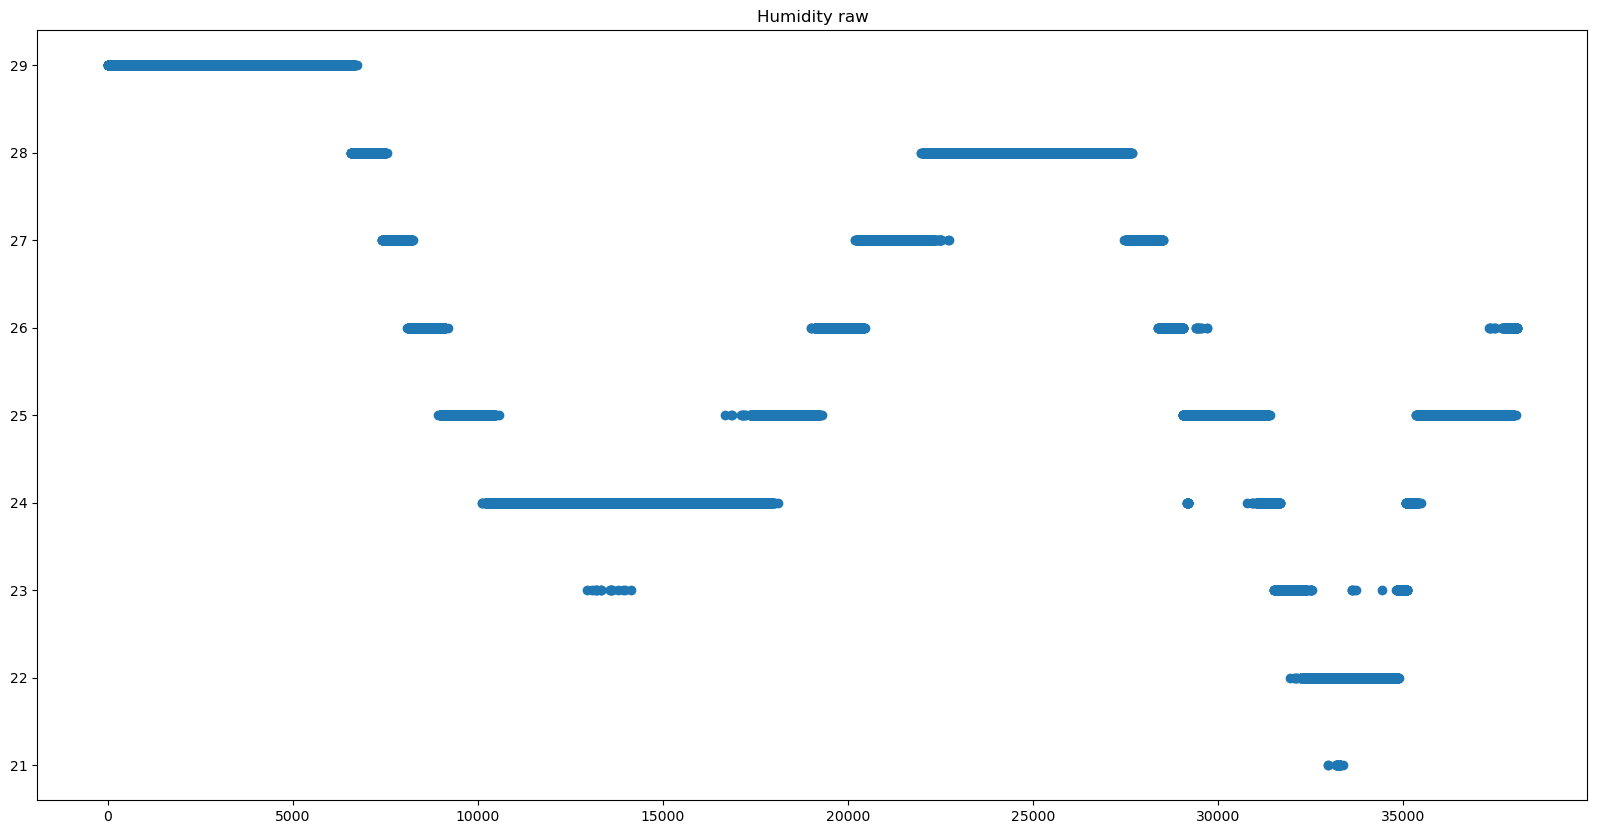

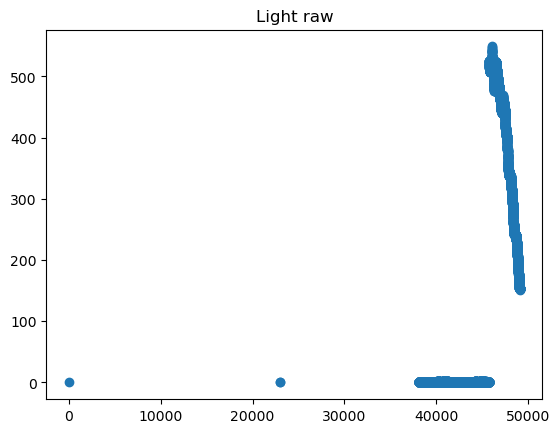

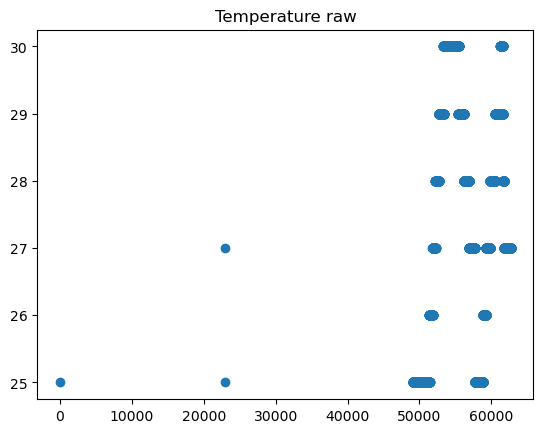

In [8]:
# import matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(df['Humidity'], marker='o', linestyle='', label='Humidity')
plt.title('Humidity raw')
plt.show()
plt.plot(df['Light'], marker='o', linestyle='', label='Light')
plt.title('Light raw')
plt.show()
plt.plot(df['Temperature'], marker='o', linestyle='', label='Temperature')
plt.title('Temperature raw')
plt.show()

In [9]:
# to be able to use method 'time' we need to convert the Time column to datetime
df['Time'] = pd.to_datetime(df['Time'])
# set the Time column as index
df.set_index('Time', inplace=True)

# interpolate the data
df_ip = df.copy()
df_ip.interpolate(method='time', inplace=True)
df_ip.head()


,Humidity,Light,Temperature
Time,,,
2022-02-28 06:00:01,29.0,0.140000,25.0
2022-02-28 06:00:01,29.0,0.140000,25.0
2022-02-28 06:00:05,29.0,0.140149,25.0
2022-02-28 06:00:06,29.0,0.140186,25.0
2022-02-28 06:00:11,29.0,0.140372,25.0


In [10]:
# resample the data to have a consistent time interval
df_ip = df_ip.resample('5min').mean()
df_ip.loc['2022-02-28']

,Humidity,Light,Temperature
Time,,,
2022-02-28 06:00:00,29.0,0.145460,25.0
2022-02-28 06:05:00,29.0,0.156587,25.0
2022-02-28 06:10:00,29.0,0.168338,25.0
2022-02-28 06:15:00,29.0,0.179095,25.0
2022-02-28 06:20:00,29.0,0.189160,25.0
...,...,...,...
2022-02-28 23:35:00,NaN,NaN,NaN
2022-02-28 23:40:00,NaN,NaN,NaN
2022-02-28 23:45:00,NaN,NaN,NaN


In [11]:
df_ip.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 415 entries, 2022-02-28 06:00:00 to 2022-03-01 16:30:00
Freq: 5min
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Humidity     320 non-null    float64
 1   Light        320 non-null    float64
 2   Temperature  320 non-null    float64
dtypes: float64(3)
memory usage: 13.0 KB


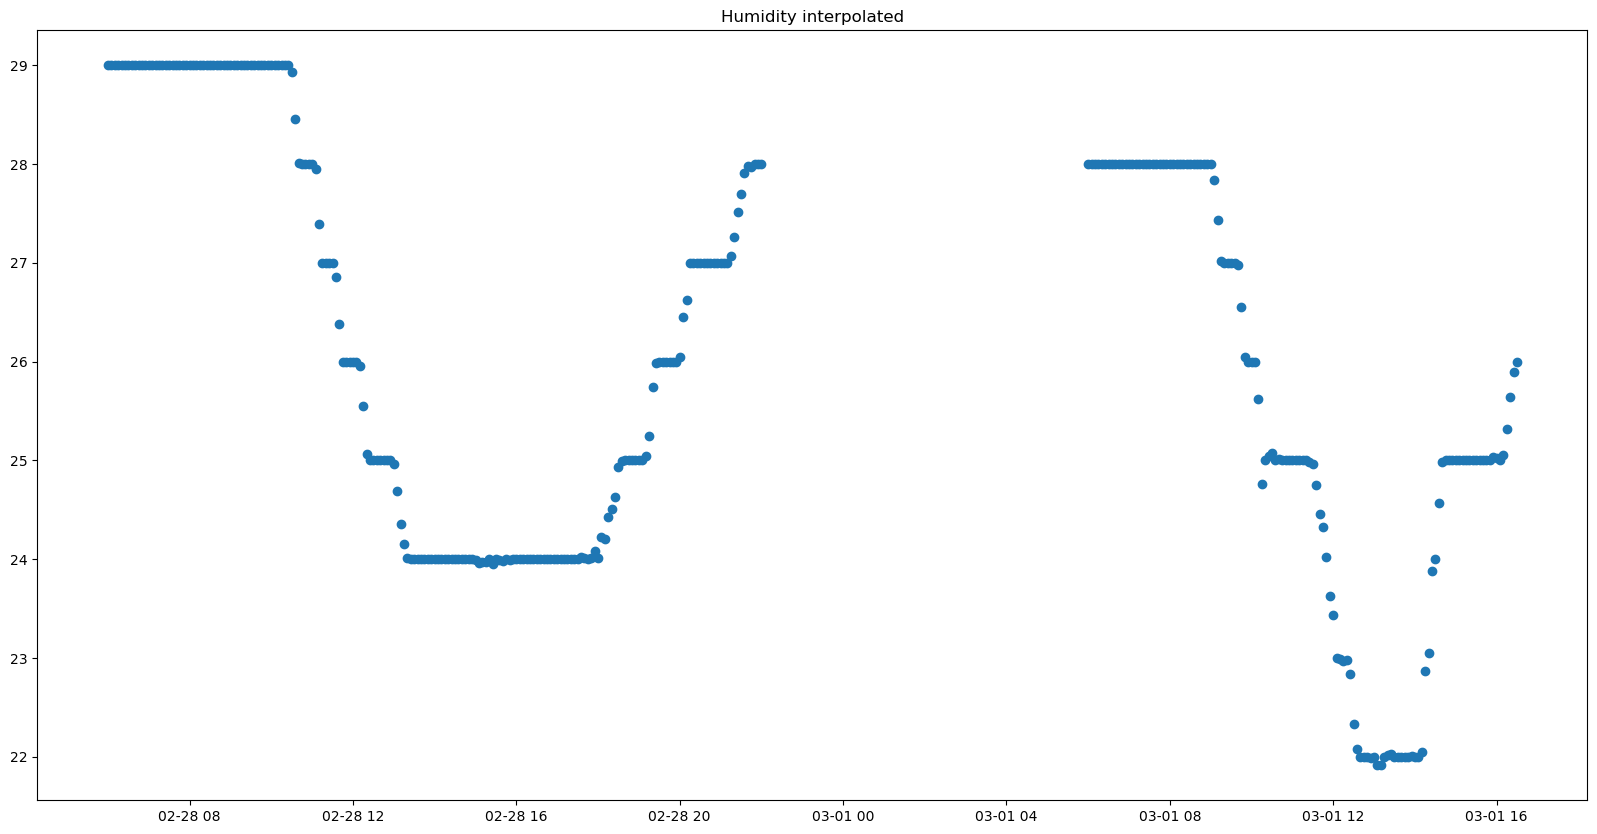

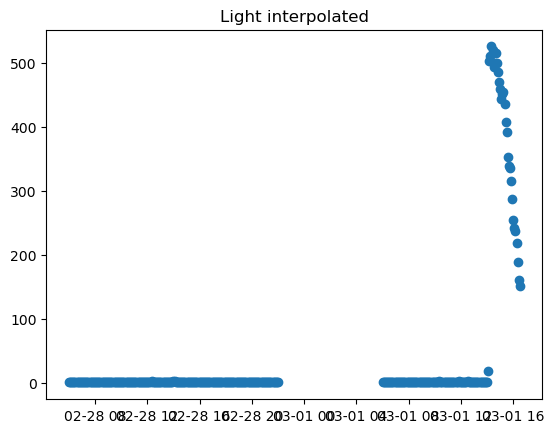

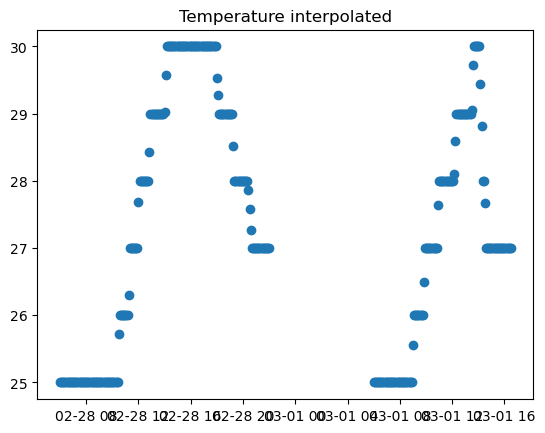

In [12]:
plt.figure(figsize=(20,10))
plt.plot(df_ip['Humidity'], marker='o', linestyle='', label='Humidity')
plt.title('Humidity interpolated')
plt.show()
plt.plot(df_ip['Light'], marker='o', linestyle='', label='Humidity')
plt.title('Light interpolated')
plt.show()
plt.plot(df_ip['Temperature'], marker='o', linestyle='', label='Temperature')
plt.title('Temperature interpolated')
plt.show()

The interpolated data looks much better. Still weird, that we have this gap in the data. But at least it's a consistent gap.

In [13]:
df_ip.describe()

,Humidity,Light,Temperature
count,320.000000,320.000000,320.000000
mean,25.986044,35.631456,27.315265
std,2.146955,116.130868,1.830944
min,21.913907,0.082268,25.000000
25%,24.000000,0.254867,25.000000
50%,25.688422,0.990193,27.000000
75%,28.000000,1.313316,29.000000
max,29.000000,526.298925,30.000000


Filling the gap: The gap looks like it is from 2022-02-28 00:00:00 to 2022-02-28 23:30:00. Before and after this gap the data is consistent and it's at night when the shopfloor might be closed. So we will interpolate them to create a smooth transition.

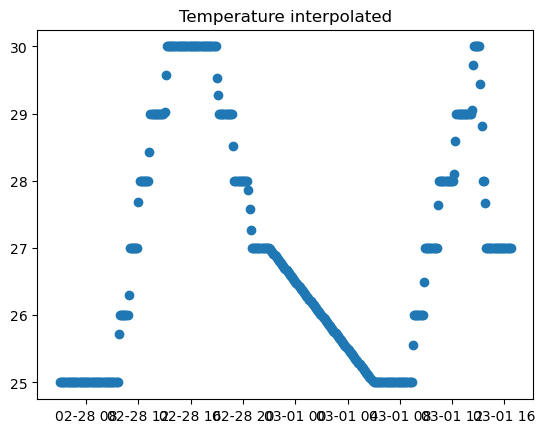

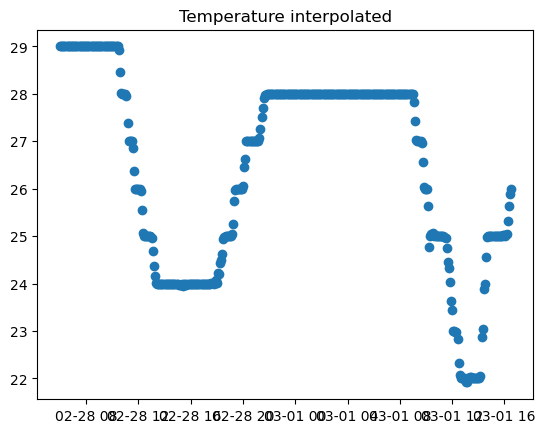

In [14]:
# using method 'linear' because the timestamps are evenly spaced
df_ip.interpolate(method='linear', inplace=True)
plt.plot(df_ip['Temperature'], marker='o', linestyle='', label='Temperature')
plt.title('Temperature interpolated')
plt.show()
plt.plot(df_ip['Humidity'], marker='o', linestyle='', label='Humidity')
plt.title('Temperature interpolated')
plt.show()

# Preparing the data for the model

Usualle for lagged features we would use a seasonal unit where the smallest is a day. Because we only have two days of data we then would not have enough data points for the model. So I decided that we use an hour as a unit.

In [15]:
# create lagged features
humidity = df_ip['Humidity']

data_humidity = pd.concat([humidity.shift(12), humidity.shift(11), humidity.shift(10), humidity.shift(9), humidity.shift(8),humidity.shift(7), humidity.shift(6), humidity.shift(5), humidity.shift(4), humidity.shift(3), humidity.shift(2), humidity.shift(1), humidity], axis=1)
data_humidity.columns = ['t-12', 't-11', 't-10', 't-9', 't-8', 't-7', 't-6', 't-5', 't-4', 't-3', 't-2', 't-1', 'humidity']
data_humidity.dropna(inplace=True)

data_humidity.head()

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,humidity
Time,,,,,,,,,,,,,
2022-02-28 07:00:00,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0
2022-02-28 07:05:00,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0
2022-02-28 07:10:00,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0
2022-02-28 07:15:00,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0
2022-02-28 07:20:00,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0


In [16]:
temperature = df_ip['Temperature']

data_temperature = pd.concat([temperature.shift(12), temperature.shift(11), temperature.shift(10), temperature.shift(9), temperature.shift(8), temperature.shift(7), temperature.shift(6), temperature.shift(5), temperature.shift(4), temperature.shift(3), temperature.shift(2), temperature.shift(1), temperature], axis=1)
data_temperature.columns = ['t-12', 't-11', 't-10', 't-9', 't-8', 't-7', 't-6', 't-5', 't-4', 't-3', 't-2', 't-1', 'temperature']
data_temperature.dropna(inplace=True)

data_temperature.head()

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,temperature
Time,,,,,,,,,,,,,
2022-02-28 07:00:00,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0
2022-02-28 07:05:00,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0
2022-02-28 07:10:00,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0
2022-02-28 07:15:00,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0
2022-02-28 07:20:00,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0


In [17]:
# Split the data into training and test data

TEST_SPLIT = 0.1
#data = data.drop(columns = ['Wind', 'Solar'])
train_size = int(len(data_humidity) * (1-TEST_SPLIT))
test_size = len(data_humidity) - train_size
train_humidity = data_humidity.iloc[0:train_size]
test_humidity = data_humidity.iloc[train_size:len(data_humidity)]
train_temperature = data_temperature.iloc[0:train_size]
test_temperature = data_temperature.iloc[train_size:len(data_temperature)]
print("Training-Data humidity:")
print(train_humidity.head())
print(train_humidity.tail())
print("Test-Data humidity:")
print(test_humidity.head())
print(test_humidity.tail())

Training-Data humidity:
                     t-12  t-11  t-10   t-9   t-8   t-7   t-6   t-5   t-4  \
Time                                                                        
2022-02-28 07:00:00  29.0  29.0  29.0  29.0  29.0  29.0  29.0  29.0  29.0   
2022-02-28 07:05:00  29.0  29.0  29.0  29.0  29.0  29.0  29.0  29.0  29.0   
2022-02-28 07:10:00  29.0  29.0  29.0  29.0  29.0  29.0  29.0  29.0  29.0   
2022-02-28 07:15:00  29.0  29.0  29.0  29.0  29.0  29.0  29.0  29.0  29.0   
2022-02-28 07:20:00  29.0  29.0  29.0  29.0  29.0  29.0  29.0  29.0  29.0   

                      t-3   t-2   t-1  humidity  
Time                                             
2022-02-28 07:00:00  29.0  29.0  29.0      29.0  
2022-02-28 07:05:00  29.0  29.0  29.0      29.0  
2022-02-28 07:10:00  29.0  29.0  29.0      29.0  
2022-02-28 07:15:00  29.0  29.0  29.0      29.0  
2022-02-28 07:20:00  29.0  29.0  29.0      29.0  
                          t-12       t-11       t-10        t-9        t-8  \
Time    

In [18]:
print("Training-Data temperature:")
print(train_humidity.head())
print(train_humidity.tail())
print("Test-Data temperature:")
print(test_humidity.head())
print(test_humidity.tail())

Training-Data temperature:
                     t-12  t-11  t-10   t-9   t-8   t-7   t-6   t-5   t-4  \
Time                                                                        
2022-02-28 07:00:00  29.0  29.0  29.0  29.0  29.0  29.0  29.0  29.0  29.0   
2022-02-28 07:05:00  29.0  29.0  29.0  29.0  29.0  29.0  29.0  29.0  29.0   
2022-02-28 07:10:00  29.0  29.0  29.0  29.0  29.0  29.0  29.0  29.0  29.0   
2022-02-28 07:15:00  29.0  29.0  29.0  29.0  29.0  29.0  29.0  29.0  29.0   
2022-02-28 07:20:00  29.0  29.0  29.0  29.0  29.0  29.0  29.0  29.0  29.0   

                      t-3   t-2   t-1  humidity  
Time                                             
2022-02-28 07:00:00  29.0  29.0  29.0      29.0  
2022-02-28 07:05:00  29.0  29.0  29.0      29.0  
2022-02-28 07:10:00  29.0  29.0  29.0      29.0  
2022-02-28 07:15:00  29.0  29.0  29.0      29.0  
2022-02-28 07:20:00  29.0  29.0  29.0      29.0  
                          t-12       t-11       t-10        t-9        t-8  \
Time 

In [19]:
# Scaling the humidity data
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

train_humidity_s = scaler.fit_transform(np.array(train_humidity))
test_humidity_s = scaler.fit_transform(np.array(test_humidity))

print("Trainingsdaten (unskaliert)\n")
print(train_humidity.head(3))
print("\nTrainingsdaten (skaliert)\n")
train_humidity_s = pd.DataFrame( train_humidity_s , columns = data_humidity.columns)
train_humidity_s = train_humidity_s.set_index(train_humidity.index)
print(train_humidity_s.head(3))

print("Testdaten (unskaliert)\n")
print(test_humidity.head(3))
print("\nTestdaten (skaliert)\n")
test_humidity_s = pd.DataFrame( test_humidity_s , columns = data_humidity.columns)
test_humidity_s = test_humidity_s.set_index(test_humidity.index )
print(test_humidity_s.head(3))

Trainingsdaten (unskaliert)

                     t-12  t-11  t-10   t-9   t-8   t-7   t-6   t-5   t-4  \
Time                                                                        
2022-02-28 07:00:00  29.0  29.0  29.0  29.0  29.0  29.0  29.0  29.0  29.0   
2022-02-28 07:05:00  29.0  29.0  29.0  29.0  29.0  29.0  29.0  29.0  29.0   
2022-02-28 07:10:00  29.0  29.0  29.0  29.0  29.0  29.0  29.0  29.0  29.0   

                      t-3   t-2   t-1  humidity  
Time                                             
2022-02-28 07:00:00  29.0  29.0  29.0      29.0  
2022-02-28 07:05:00  29.0  29.0  29.0      29.0  
2022-02-28 07:10:00  29.0  29.0  29.0      29.0  

Trainingsdaten (skaliert)

                     t-12  t-11  t-10  t-9  t-8  t-7  t-6  t-5  t-4  t-3  t-2  \
Time                                                                            
2022-02-28 07:00:00   1.0   1.0   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
2022-02-28 07:05:00   1.0   1.0   1.0  1.0  1.0  1.0  1.0  1.0  

In [20]:
train_temperature_s = scaler.fit_transform(np.array(train_temperature))
test_temperature_s = scaler.fit_transform(np.array(test_temperature))

print("Trainingsdaten (unskaliert)\n")
print(train_temperature.head(3))
print("\nTrainingsdaten (skaliert)\n")
train_temperature_s = pd.DataFrame( train_temperature_s , columns = data_temperature.columns)
train_temperature_s = train_temperature_s.set_index(train_temperature.index)
print(train_temperature_s.head(3))

print("Testdaten (unskaliert)\n")
print(test_temperature.head(3))
print("\nTestdaten (skaliert)\n")
test_temperature_s = pd.DataFrame( test_temperature_s , columns = data_temperature.columns)
test_temperature_s = test_temperature_s.set_index(test_temperature.index )
print(test_temperature_s.head(3))

Trainingsdaten (unskaliert)

                     t-12  t-11  t-10   t-9   t-8   t-7   t-6   t-5   t-4  \
Time                                                                        
2022-02-28 07:00:00  25.0  25.0  25.0  25.0  25.0  25.0  25.0  25.0  25.0   
2022-02-28 07:05:00  25.0  25.0  25.0  25.0  25.0  25.0  25.0  25.0  25.0   
2022-02-28 07:10:00  25.0  25.0  25.0  25.0  25.0  25.0  25.0  25.0  25.0   

                      t-3   t-2   t-1  temperature  
Time                                                
2022-02-28 07:00:00  25.0  25.0  25.0         25.0  
2022-02-28 07:05:00  25.0  25.0  25.0         25.0  
2022-02-28 07:10:00  25.0  25.0  25.0         25.0  

Trainingsdaten (skaliert)

                     t-12  t-11  t-10  t-9  t-8  t-7  t-6  t-5  t-4  t-3  t-2  \
Time                                                                            
2022-02-28 07:00:00   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2022-02-28 07:05:00   0.0   0.0   0.0  0.0  0.0  

In [21]:
# seperate into features and labels
X_train_humidity = train_humidity_s.drop('humidity', axis=1)
y_train_humidity = train_humidity_s['humidity']

X_train_temperature = train_temperature_s.drop('temperature', axis=1)
y_train_temperature = train_temperature_s['temperature']

print(X_train_humidity.head())
print(y_train_humidity.head())
print(X_train_temperature.head())
print(y_train_temperature.head())

                     t-12  t-11  t-10  t-9  t-8  t-7  t-6  t-5  t-4  t-3  t-2  \
Time                                                                            
2022-02-28 07:00:00   1.0   1.0   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
2022-02-28 07:05:00   1.0   1.0   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
2022-02-28 07:10:00   1.0   1.0   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
2022-02-28 07:15:00   1.0   1.0   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
2022-02-28 07:20:00   1.0   1.0   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   

                     t-1  
Time                      
2022-02-28 07:00:00  1.0  
2022-02-28 07:05:00  1.0  
2022-02-28 07:10:00  1.0  
2022-02-28 07:15:00  1.0  
2022-02-28 07:20:00  1.0  
Time
2022-02-28 07:00:00    1.0
2022-02-28 07:05:00    1.0
2022-02-28 07:10:00    1.0
2022-02-28 07:15:00    1.0
2022-02-28 07:20:00    1.0
Freq: 5min, Name: humidity, dtype: float64
                     t-12  t-11  t-10  t-9  t-8  t-7  t-6  t

In [22]:
# create the test data
X_test_humidity = test_humidity_s.drop('humidity', axis=1)
y_test_humidity = test_humidity_s['humidity']

X_test_temperature = test_temperature_s.drop('temperature', axis=1)
y_test_temperature = test_temperature_s['temperature']

print(X_test_humidity.head())
print(y_test_humidity.head())
print(X_test_temperature.head())
print(y_test_temperature.head())

                         t-12      t-11      t-10       t-9       t-8  \
Time                                                                    
2022-03-01 13:10:00  0.348723  0.342330  0.346345  0.298071  0.135197   
2022-03-01 13:15:00  0.342330  0.346345  0.298071  0.135197  0.054076   
2022-03-01 13:20:00  0.346345  0.298071  0.135197  0.054076  0.027897   
2022-03-01 13:25:00  0.298071  0.135197  0.054076  0.027897  0.027897   
2022-03-01 13:30:00  0.135197  0.054076  0.027897  0.027897  0.027897   

                          t-7       t-6       t-5       t-4       t-3  \
Time                                                                    
2022-03-01 13:10:00  0.053487  0.027593  0.027593  0.027407  0.020897   
2022-03-01 13:15:00  0.027593  0.027593  0.027593  0.022656  0.025280   
2022-03-01 13:20:00  0.027593  0.027593  0.022809  0.027407  0.001243   
2022-03-01 13:25:00  0.027593  0.022809  0.027593  0.001348  0.000000   
2022-03-01 13:30:00  0.022809  0.027593  0.001357 

In [35]:
# transform data to 3D numpy arrays
X_train_humidity = np.array(X_train_humidity)
X_train_humidity = np.reshape(X_train_humidity,
                     (X_train_humidity.shape[0], X_train_humidity.shape[1], 1))

X_train_temperature = np.array(X_train_temperature)
X_train_temperature = np.reshape(X_train_temperature,
                     (X_train_temperature.shape[0], X_train_temperature.shape[1], 1))

X_test_humidity = np.array(X_test_humidity)
X_test_humidity = np.reshape(X_test_humidity,
                     (X_test_humidity.shape[0], X_test_humidity.shape[1], 1))

X_test_temperature = np.array(X_test_temperature)
X_test_temperature = np.reshape(X_test_temperature,
                     (X_test_temperature.shape[0], X_test_temperature.shape[1], 1))

# transform the labels to numpy arrays
y_train_humidity = np.array(y_train_humidity)
y_train_temperature = np.array(y_train_temperature)
y_test_humidity = np.array(y_test_humidity)
y_test_temperature = np.array(y_test_temperature)

[[[1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]]]
[[[1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [1.]]]


# Create the Model and train it

In [24]:
import tensorflow as tf
import keras as keras
from keras.models import Sequential
from keras.layers import *
from keras.callbacks import ModelCheckpoint
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.optimizers import Adam

model = Sequential()
model.add(InputLayer((X_train_humidity.shape[1], X_train_humidity.shape[2])))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [25]:
cp = ModelCheckpoint('models/model_humidity.h5', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [26]:
model.fit(X_train_humidity, y_train_humidity, epochs=100, batch_size=32, validation_split=0.1, callbacks=[cp])

Epoch 1/100
11/11 [==============================] - 3s 75ms/step - loss: 0.1299 - root_mean_squared_error: 0.3603 - val_loss: 0.0511 - val_root_mean_squared_error: 0.2259
Epoch 2/100
11/11 [==============================] - 0s 16ms/step - loss: 0.0224 - root_mean_squared_error: 0.1496 - val_loss: 0.0137 - val_root_mean_squared_error: 0.1171
Epoch 3/100
11/11 [==============================] - 0s 7ms/step - loss: 0.0090 - root_mean_squared_error: 0.0950 - val_loss: 0.0155 - val_root_mean_squared_error: 0.1247
Epoch 4/100
11/11 [==============================] - 0s 8ms/step - loss: 0.0033 - root_mean_squared_error: 0.0576 - val_loss: 0.0254 - val_root_mean_squared_error: 0.1593
Epoch 5/100
11/11 [==============================] - 0s 8ms/step - loss: 0.0030 - root_mean_squared_error: 0.0552 - val_loss: 0.0156 - val_root_mean_squared_error: 0.1249
Epoch 6/100
11/11 [==============================] - 0s 9ms/step - loss: 0.0029 - root_mean_squared_error: 0.0536 - val_loss: 0.0185 - val_root

In [43]:
from keras.models import load_model
model_humidity = load_model('models/model_humidity.h5')

In [46]:
test_predictions_humidity = model_humidity.predict(X_test_humidity)
X_test_humidity = np.reshape(X_test_humidity, (X_test_humidity.shape[0], X_test_humidity.shape[1]))
print(test_predictions_humidity.shape)
print(X_test_humidity.shape)
predictions_humidity = np.concatenate((X_test_humidity, test_predictions_humidity), axis=1)
predictions_humidity = scaler.inverse_transform(predictions_humidity)
predictions_humidity = pd.DataFrame(predictions_humidity, columns=test_humidity_s.columns)

test_humidity = scaler.inverse_transform(test_humidity_s)
test_humidity = pd.DataFrame(test_humidity, columns=test_humidity_s.columns)
compare_humidity = pd.DataFrame({'real':test_humidity['humidity'], 'pred':predictions_humidity['humidity']})
compare_humidity

2/2 [==============================] - 0s 3ms/step
(41, 1)
(41, 12)


,real,pred
0,27.000000,26.922113
1,27.063209,26.926840
2,27.080023,26.952933
3,27.084414,26.995141
4,27.063209,27.038397
5,27.063209,27.057899
6,27.063209,27.066321
7,27.063209,27.069752
8,27.063209,27.071511
9,27.067769,27.072166
